# Car Acceptibility Predictor

The description of each variable are :

Buying_Price - Categorical Data [vhigh, high, med, low]

Maintenance_Price - Categorical Data [vhigh, high, med, low]

No_of_Doors - Categorical Data

Person_Capacity - Categorical Data [2, 4, more]

Size_of_Luggage - Categorical Data [small, med, big]

Safety - Categorical Data

Car_Acceptability - Categorical Data

In [1]:
# import libriaries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cars_df = pd.read_csv("car_data.csv")
print(len(cars_df))
print()
cars_df.head()

1727



,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
#Since our dataset doesn't contain the name of columns, the column names will be assigned 
cars_df.columns = ['buying', 'maint', 'doors','persons','lug_boot','safety','class']
print(len(cars_df))
print()
cars_df.head()

1727



,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## Explore Data

In [4]:
cars_df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
cars_df.shape

(1727, 7)

We can see that all the data types are objects. All the values in the data are categorical variables. There are  not numerical or continuous variables.

Let's view all the number of unique values in each column.

In [7]:
# view unique values in each column
for col in cars_df.columns:
    print(f"{col} column has {cars_df[col].nunique()} unique values ")
    print()

buying column has 4 unique values 

maint column has 4 unique values 

doors column has 4 unique values 

persons column has 3 unique values 

lug_boot column has 3 unique values 

safety column has 3 unique values 

class column has 4 unique values 



We can see that there are only 3 or 4 number of unique values in each column in the data set.

In [8]:
# lets print out the unique values
for col in cars_df.columns: 
    print(f"{col} column unique values:")
    print(cars_df[col].unique()) 
    print()

buying column unique values:
['vhigh' 'high' 'med' 'low']

maint column unique values:
['vhigh' 'high' 'med' 'low']

doors column unique values:
['2' '3' '4' '5more']

persons column unique values:
['2' '4' 'more']

lug_boot column unique values:
['small' 'med' 'big']

safety column unique values:
['med' 'high' 'low']

class column unique values:
['unacc' 'acc' 'vgood' 'good']



We can see and understand why all the values in the data set are object data types. This is because the are all categorical or ordinal numeric data types.

Let us look the distribution of the all the columns in the data

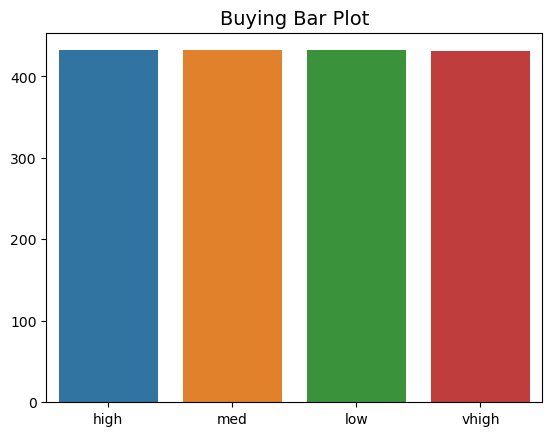

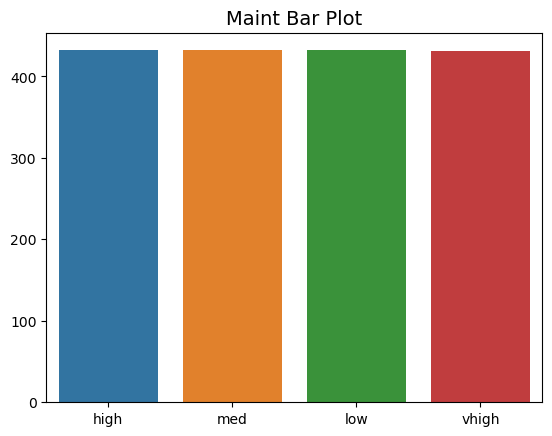

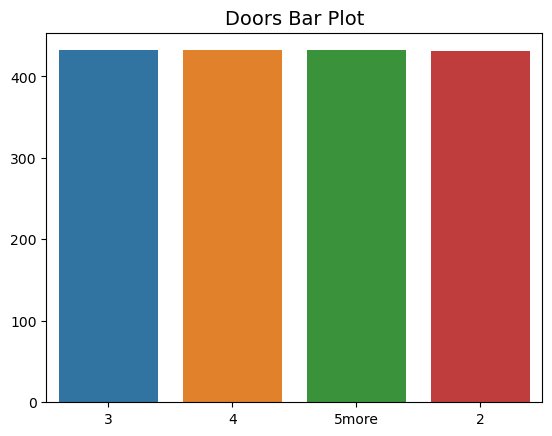

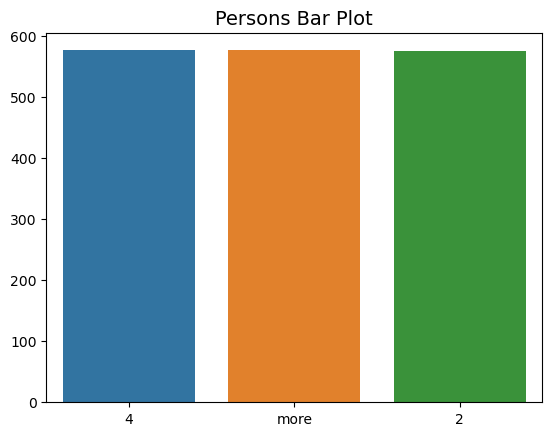

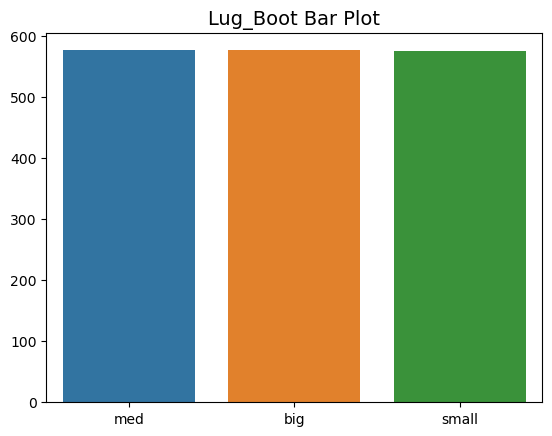

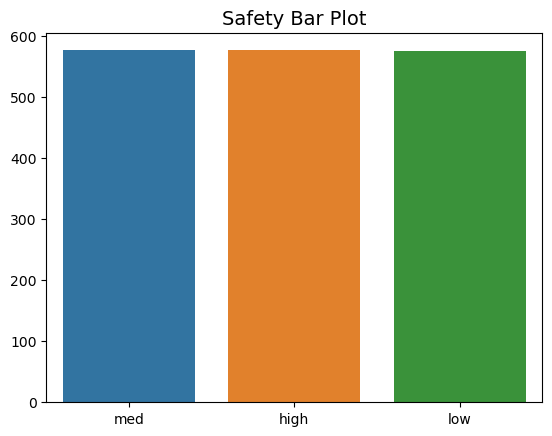

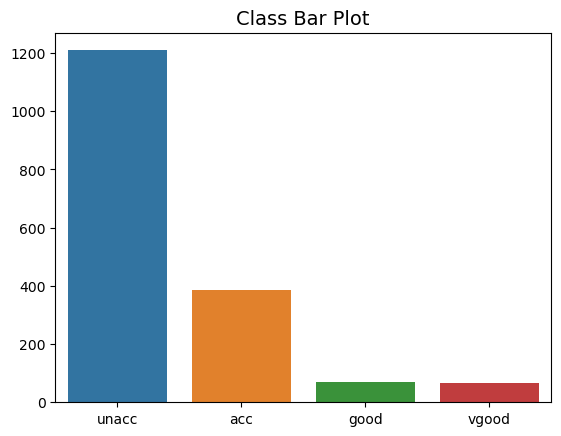

In [9]:
# plot a bar plot of all the columns
for col in cars_df.columns:
    plt.figure()
    plt.title(f"{col.title()} Bar Plot", fontsize=14)
    sns.barplot(x=cars_df[col].value_counts().index, 
                y=cars_df[col].value_counts().values)

In [10]:
# Seperate Features and labels
X = cars_df.drop(columns=["class"])
y = cars_df["class"]

In [11]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [12]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

## Label Encoding

This will convert categorical variable to numerical variables

In [13]:
# import encoder 
from sklearn.preprocessing import LabelEncoder

# instanciate LabelEncoder
encoder = LabelEncoder()
data = X.copy()

get_mappings = {}
for col in list(data.columns):
    data[col] = encoder.fit_transform(data[col])
    get_mappings[col] = dict(zip(encoder.classes_, 
                                 encoder.transform(encoder.classes_))) 
    
print(get_mappings)  
data

{'buying': {'high': 0, 'low': 1, 'med': 2, 'vhigh': 3}, 'maint': {'high': 0, 'low': 1, 'med': 2, 'vhigh': 3}, 'doors': {'2': 0, '3': 1, '4': 2, '5more': 3}, 'persons': {'2': 0, '4': 1, 'more': 2}, 'lug_boot': {'big': 0, 'med': 1, 'small': 2}, 'safety': {'high': 0, 'low': 1, 'med': 2}}


,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


In [14]:
encoder.classes_

array(['high', 'low', 'med'], dtype=object)

In [15]:
encoder.transform(encoder.classes_)

array([0, 1, 2])

In [16]:
get_mappings

{'buying': {'high': 0, 'low': 1, 'med': 2, 'vhigh': 3},
 'maint': {'high': 0, 'low': 1, 'med': 2, 'vhigh': 3},
 'doors': {'2': 0, '3': 1, '4': 2, '5more': 3},
 'persons': {'2': 0, '4': 1, 'more': 2},
 'lug_boot': {'big': 0, 'med': 1, 'small': 2},
 'safety': {'high': 0, 'low': 1, 'med': 2}}

## Model Building


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
import pickle

In [17]:
# split data
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    y, 
                                                    test_size=0.2)

len(X_train), len(X_test), len(y_train), len(y_test)

(1381, 346, 1381, 346)